In [135]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

class KMeans():
    def __init__(self, K, X=None, N=0):
        self.K = K
        if X == None:
            if N == 0:
                raise Exception("If no data is provided, \
                                 a parameter N (number of points) is needed")
            else:
                self.N = N
                self.X = self._init_board_gauss(N, K)
        else:
            self.X = X
            self.N = len(X)
        self.mu = None
        self.clusters = None
        self.method = None
 
    def _init_board_gauss(self, N, k):
        n = float(N)/k
        X = []
        for i in range(k):
            c = (random.uniform(-1,1), random.uniform(-1,1))
            s = random.uniform(0.05,0.15)
            x = []
            while len(x) < n:
                a,b = np.array([np.random.normal(c[0],s),np.random.normal(c[1],s)])
                # Continue drawing points from the distribution in the range [-1,1]
                if abs(a) and abs(b)<1:
                    x.append([a,b])
            X.extend(x)
        X = np.array(X)[:N]
        return X
 
    def plot_board(self):
        X = self.X
        fig = plt.figure(figsize=(5,5))
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        if self.mu and self.clusters:
            mu = self.mu
            clus = self.clusters
            K = self.K
            
            
            datapoints = []
            labels = []
            for i in clus:
                for item in clus[i]:
                    datapoints.append([item[0], item[1]])
                    labels.append(i)
            
            datapoints = np.asarray(datapoints)
            labels = np.array(labels)
            #print datapoints
            x_min, x_max = datapoints[:][0].min() - .5, datapoints[:][0].max() + .5
            y_min, y_max = datapoints[:][1].min() - .5, datapoints[:][1].max() + .5
            print("{} {} {} {}").format(x_min, x_max, y_min, y_max)
            xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
            #Z = labels.reshape(xx.shape)
            
            Z = labels
            print Z
            
            plt.pcolormesh(xx, yy, Z)
            
            #plt.imshow(Z, interpolation='nearest',
           #extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           #cmap=plt.cm.Paired,
           #aspect='auto', origin='lower')
            for m, clu in clus.items():
                #cs = plt.cm.spectral(1.*m/self.K)
                cs = ["#267f8c", "#7db686", "#abc433"]
                plt.plot(mu[m][0], mu[m][1], 'o', marker='o', \
                         markersize=12, color=cs[m])
                plt.plot(zip(*clus[m])[0], zip(*clus[m])[1], '.', \
                         markersize=8, color=cs[m], alpha=0.5)
        else:
            plt.plot(zip(*X)[0], zip(*X)[1], '.', alpha=0.5)
        if self.method == '++':
            tit = 'K-means++'
        else:
            tit = 'K-means with random initialization'
        pars = 'N=%s, K=%s' % (str(self.N), str(self.K))
        plt.title('\n'.join([pars, tit]), fontsize=16)
        plt.savefig('kpp_N%s_K%s.png' % (str(self.N), str(self.K)), \
                    bbox_inches='tight', dpi=200)
 
    def _cluster_points(self):
        mu = self.mu
        clusters  = {}
        for x in self.X:
            bestmukey = min([(i[0], np.linalg.norm(x-mu[i[0]])) \
                             for i in enumerate(mu)], key=lambda t:t[1])[0]
            try:
                clusters[bestmukey].append(x)
            except KeyError:
                clusters[bestmukey] = [x]
        self.clusters = clusters
 
    def _reevaluate_centers(self):
        clusters = self.clusters
        newmu = []
        keys = sorted(self.clusters.keys())
        for k in keys:
            newmu.append(np.mean(clusters[k], axis = 0))
        self.mu = newmu
 
    def _has_converged(self):
        K = len(self.oldmu)
        return(set([tuple(a) for a in self.mu]) == \
               set([tuple(a) for a in self.oldmu])\
               and len(set([tuple(a) for a in self.mu])) == K)
 
    def find_centers(self, method='random'):
        self.method = method
        X = self.X
        K = self.K
        self.oldmu = random.sample(X, K)
        self.plot_board()
        if method != '++':
            # Initialize to K random centers
            self.mu = random.sample(X, K)
            #self.plot_board()
        while not self._has_converged():
            self.oldmu = self.mu
            #self.plot_board()
            # Assign all points in X to clusters
            self._cluster_points()
            self.plot_board()
            # Reevaluate centers
            self._reevaluate_centers()
            self.plot_board()

-1.20127086656 1.21465479348 -1.20967948253 1.17795905358
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


ValueError: need more than 1 value to unpack

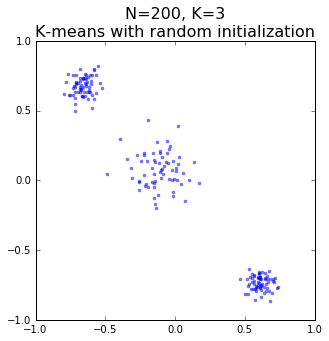

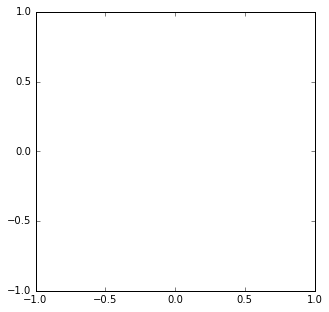

In [136]:
%matplotlib inline

kmeans = KMeans(3, N=200)
kmeans.find_centers()
